In [ ]:

#data collection.(kaggle open source repository)
#data preprocessing (data cleaning).
#feature extraction.
#model implementation.
#training and testing.
#evaluation.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os

#import itertools
#import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
layers = keras.layers
models = keras.models


In [28]:
data = pd.read_csv(r"C:\Users\MrLaptop\Desktop\bbc.csv")

In [29]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [30]:
data['category'].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [31]:
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 1780
Test size: 445


Text(0.5, 1.0, 'The Distribution of Category')

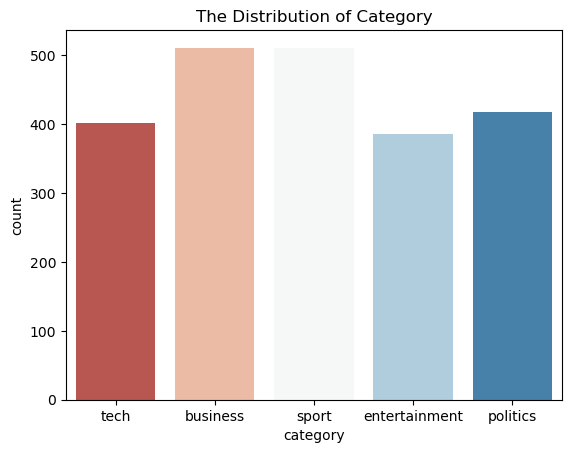

In [33]:
import seaborn as sns
sns.countplot(data = data, x = "category", palette = "RdBu")
plt.title("The Distribution of Category")

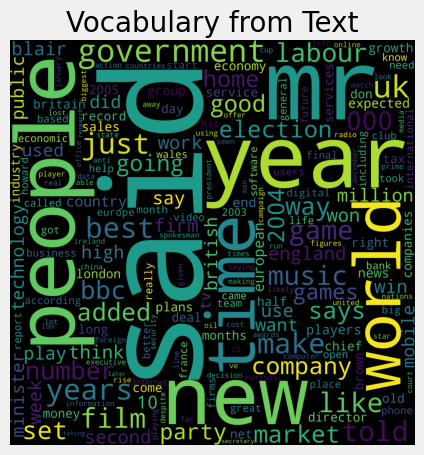

In [38]:
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['text'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'black', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Text", fontsize = 20)
plt.show()

(array([1.788e+03, 4.100e+02, 1.800e+01, 2.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  501. ,  2999.2,  5497.4,  7995.6, 10493.8, 12992. , 15490.2,
        17988.4, 20486.6, 22984.8, 25483. ]),
 <BarContainer object of 10 artists>)

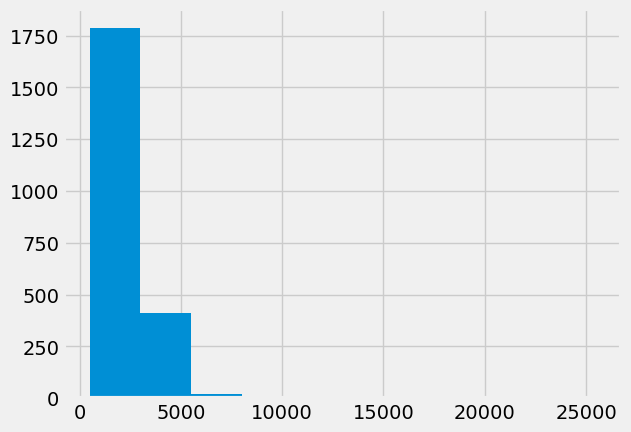

In [39]:
data['length'] = data['text'].apply(len)
plt.hist(x=data['length'])

In [6]:
def train_test_split(data, train_size):
    train = data[:train_size]
    test = data[train_size:]
    return train, test

In [7]:
train_cat, test_cat = train_test_split(data['category'], train_size)
train_text, test_text = train_test_split(data['text'], train_size)

In [8]:
max_words = 1000 #how much words pass to the algorithm
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, 
                                              char_level=False)

In [9]:
tokenize.fit_on_texts(train_text) # fit tokenizer to our training text data
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [10]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [11]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1780, 1000)
x_test shape: (445, 1000)
y_train shape: (1780, 5)
y_test shape: (445, 5)


In [13]:
# This model trains very quickly and 2 epochs are already more than enough
# Training for more epochs will likely lead to overfitting on this dataset
# You can try tweaking these hyperparamaters when using this model with your own data
batch_size = 32
epochs = 2
drop_ratio = 0.5

In [14]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(drop_ratio))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\MrLaptop\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/2
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7299 - loss: 0.8276 - val_accuracy: 0.9494 - val_loss: 0.1472
Epoch 2/2
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9889 - loss: 0.0509 - val_accuracy: 0.9551 - val_loss: 0.1153


## Evaluate the model
Evaluation is easy. Just call `model.evaluate()`.

In [16]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9712 - loss: 0.1351 
Test loss: 0.13606798648834229
Test accuracy: 0.9640449285507202


## Hyperparameter tuning

In [17]:
def run_experiment(batch_size, epochs, drop_ratio):
  print('batch size: {}, epochs: {}, drop_ratio: {}'.format(
      batch_size, epochs, drop_ratio))
  model = models.Sequential()
  model.add(layers.Dense(512, input_shape=(max_words,)))
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(drop_ratio))
  model.add(layers.Dense(num_classes))
  model.add(layers.Activation('softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.1)
  score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=0)
  print('\tTest loss:', score[0])
  print('\tTest accuracy:', score[1])

In [18]:
batch_size = 16
epochs = 4
drop_ratio = 0.4
run_experiment(batch_size, epochs, drop_ratio)

batch size: 16, epochs: 4, drop_ratio: 0.4
	Test loss: 0.13313505053520203
	Test accuracy: 0.9595505595207214


In [19]:
# Note: The data processed for this output had the max text length set to 400.
# for batch_size in range(10,31,10):
#   for epochs in range(3,15,5):
#     for drop_ratio in np.linspace(0.1, 0.5, 3):
#       run_experiment(batch_size, epochs, drop_ratio)

## Make some predictions
Take some samples from the test dataset and inspect some individual predictions, to ensure that things are sensible.


In [20]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_text.iloc[i][:50], "...")
    print('Actual label:' + test_cat.iloc[i])
    print("Predicted label: " + predicted_label + "\n")  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
hobbit picture  four years away  lord of the rings ...
Actual label:entertainment
Predicted label: entertainment

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
game firm holds  cast  auditions video game firm b ...
Actual label:tech
Predicted label: tech

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
clarke plans migrant point scheme anyone planning  ...
Actual label:politics
Predicted label: politics

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
radcliffe will compete in london paula radcliffe w ...
Actual label:sport
Predicted label: sport

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
serena becomes world number two serena williams ha ...
Actual label:sport
Predicted label: sport

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
ultimate game  award for doom 3 sci-fi shooter doo ...
Actual label:tech
Predicted label: tech

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
algeria hit by further gas riots algeria suffered  ...
Actual label:business
Predicted label: business

1/1 ━━━━━━━━━━━━━━━━━━━━

In [21]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [22]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

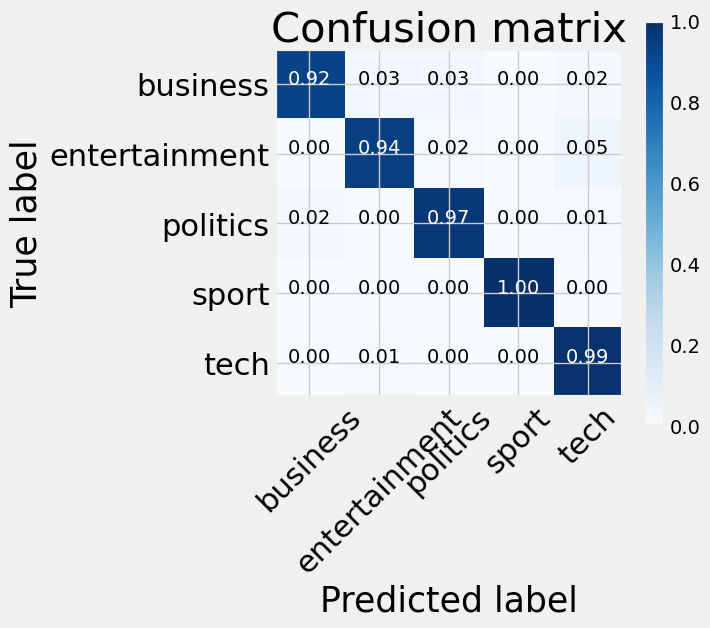

In [40]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [3]:
# RentableObject class with name and available attributes
class RentableObject:
    def __init__(self, name, available=True):
        self.name = name
        self.available = available

    def __str__(self):
        return f"RentableObject(name={self.name}, available={self.available})"


# Book class, child of RentableObject, with an additional author attribute
class Book(RentableObject):
    def __init__(self, name, author, available=True):
        super().__init__(name, available)  # Call parent constructor to initialize name and available
        self.author = author

    def __str__(self):
        return f"Book(name={self.name}, author={self.author}, available={self.available})"


# DVD class, child of RentableObject, with an additional director attribute
class DVD(RentableObject):
    def __init__(self, name, director, available=True):
        super().__init__(name, available)  # Call parent constructor to initialize name and available
        self.director = director

    def __str__(self):
        return f"DVD(name={self.name}, director={self.director}, available={self.available})"
# Import the module rentable
from rentable import Book, DVD

# Create instances of Book and DVD
book1 = Book(name="The Great Gatsby", author="F. Scott Fitzgerald")
dvd1 = DVD(name="Inception", director="Christopher Nolan")

# Print instances to see their details
print(book1)  # Output: Book(name=The Great Gatsby, author=F. Scott Fitzgerald, available=True)
print(dvd1)   # Output: DVD(name=Inception, director=Christopher Nolan, available=True)


ModuleNotFoundError: No module named 'rentable'

In [4]:
from abc import ABC, abstractmethod
from typing import List, Tuple

# Abstract Base Class for Rentable Objects
class RentableObject(ABC):
    def __init__(self, name: str, available: bool = True):
        self.name = name
        self.available = available
        self.customer = None
        self.rented_days = 0
        self.rental_history: List[Tuple[str, int]] = []  # Stores (customer, days rented)

    @abstractmethod
    def rent_item(self, customer: str, days: int):
        pass

    @abstractmethod
    def return_item(self):
        pass

    def __str__(self):
        availability = "Available" if self.available else "Not Available"
        return f"{self.__class__.__name__} - {self.name} – {availability}"

# Book Class (Child of RentableObject)
class Book(RentableObject):
    def __init__(self, name: str, author: str, available: bool = True):
        super().__init__(name, available)
        self.author = author

    def rent_item(self, customer: str, days: int = 14):
        if self.available:
            self.customer = customer
            self.rented_days = days
            self.available = False
            self.rental_history.append((customer, days))
            print(f"{self.name} has been rented by {customer} for {days} days.")
        else:
            print(f"Sorry, {self.name} is already rented out.")

    def return_item(self):
        if not self.available:
            print(f"{self.name} is being returned by {self.customer}.")
            self.customer = None
            self.rented_days = 0
            self.available = True
        else:
            print(f"{self.name} is not currently rented.")

    def __str__(self):
        return f"Book - {self.name} by {self.author} (Book) – {'Available' if self.available else 'Not Available'}"

# DVD Class (Child of RentableObject)
class DVD(RentableObject):
    def __init__(self, name: str, director: str, available: bool = True):
        super().__init__(name, available)
        self.director = director

    def rent_item(self, customer: str, days: int = 7):
        if self.available:
            self.customer = customer
            self.rented_days = days
            self.available = False
            self.rental_history.append((customer, days))
            print(f"{self.name} has been rented by {customer} for {days} days.")
        else:
            print(f"Sorry, {self.name} is already rented out.")

    def return_item(self):
        if not self.available:
            print(f"{self.name} is being returned by {self.customer}.")
            self.customer = None
            self.rented_days = 0
            self.available = True
        else:
            print(f"{self.name} is not currently rented.")

    def __str__(self):
        return f"DVD - {self.name} by {self.director} – {'Available' if self.available else 'Not Available'}"

# Testing the functionality of the Rentable objects
if __name__ == "__main__":
    # Create instances of Book and DVD
    book = Book(name="Harry Potter", author="JK Rowling")
    dvd = DVD(name="The Dark Knight", director="Christopher Nolan")

    # Print initial details
    print(book)
    print(dvd)

    # Rent items
    book.rent_item(customer="Alice", days=10)
    dvd.rent_item(customer="Bob", days=5)

    # Print rental status
    print(book)
    print(dvd)

    # Return items
    book.return_item()
    dvd.return_item()

    # Print rental history
    print(f"Rental History for {book.name}: {book.rental_history}")
    print(f"Rental History for {dvd.name}: {dvd.rental_history}")


Book - Harry Potter by JK Rowling (Book) – Available
DVD - The Dark Knight by Christopher Nolan – Available
Harry Potter has been rented by Alice for 10 days.
The Dark Knight has been rented by Bob for 5 days.
Book - Harry Potter by JK Rowling (Book) – Not Available
DVD - The Dark Knight by Christopher Nolan – Not Available
Harry Potter is being returned by Alice.
The Dark Knight is being returned by Bob.
Rental History for Harry Potter: [('Alice', 10)]
Rental History for The Dark Knight: [('Bob', 5)]
